# Repeat Accumulate Codes on the BEC

This code is provided as supplementary material of the lecture Channel Coding 2 - Advanced Methods.

This code illustrates
* Convergence analysis of repeat accumulate codes and regular LDPC codes on the binary erasure channel (BEC)

In [7]:
import numpy as np
import matplotlib.pyplot as plot
from ipywidgets import interactive
from scipy.optimize import fsolve
import ipywidgets as widgets
import math
%matplotlib inline  

In this notebook, we look at the performance evaluation of regular repeat-accumulate codes and compare them with regular $[d_{\mathtt{v}},d_{\mathtt{c}}]$ LDPC codes. We first consider the fixed-point equation before looking at the evolution of the message erasure probability as a function of the erasures. We look at both LDPC and RA codes.

---

This code evaluates the fixed point equation for regular $[d_{\mathtt{v}},d_{\mathtt{c}}]$ LDPC codes. The fixed point equation in this case reads
$$f(\epsilon,\xi)-\xi <= 0\quad \forall \xi \in (0,1]$$
with
$$f(\epsilon,\xi) = \epsilon\left(1-(1-\xi)^{d_{\mathtt{c}}-1}\right)^{d_{\mathtt{v}}-1}$$

In [64]:
def threshold_LDPC(dv, dc):  
    
    # binary search to find fixed point
    epsilon = 0.5
    delta_epsilon = 0.5
    
    while delta_epsilon > 0.00001:            
        fp = lambda x : epsilon * (1 - (1-x)**(dc-1))**(dv-1) - x
        x_0,_,ier,mesg = fsolve(fp, epsilon, full_output=True)        
    
        if x_0 > 1e-6 and ier == 1 and np.abs(fp(x_0)) < 1e-6:
            epsilon = epsilon - delta_epsilon/2
        else:
            epsilon = epsilon + delta_epsilon/2
    
        delta_epsilon = delta_epsilon/2
           
    return epsilon

This code evaluates the fixed point equation for regular $[d_{\mathtt{v}},d_{\mathtt{c}}]$ repeat-accumulate codes. The fixed point equation in this case reads
$$f(\epsilon,\xi)-\xi <= 0\quad \forall \xi \in (0,1]$$
with
$$f(\epsilon,\xi) = \epsilon\left(1-\left(\frac{1-\epsilon}{1-\epsilon(1-\xi)^{d_{\mathtt{c}}}}\right)^2(1-\xi)^{d_{\mathtt{c}}-1}\right)^{d_{\mathtt{v}}-1}$$


In [60]:
def threshold_RA(dv, dc):  
    
    # binary search to find fixed point
    epsilon = 0.5
    delta_epsilon = 0.5
    
    while delta_epsilon > 0.000001:            
        fp = lambda x : epsilon * (1 - ((1-epsilon)/(1-epsilon*(1-x)**dc))**2 * (1-x)**(dc-1))**(dv-1) - x
        x_0,_,ier,mesg = fsolve(fp, epsilon, full_output=True)            
        
        if x_0 > 1e-6 and ier == 1 and np.abs(fp(x_0)) < 1e-6:
            epsilon = epsilon - delta_epsilon/2
        else:
            epsilon = epsilon + delta_epsilon/2
    
        delta_epsilon = delta_epsilon/2
           
    return epsilon

The plot below the thresholds of several rate $1/2$ LDPC and repeat accumulate codes. For LDPC codes, check and variable node degrees are related as $d_{\mathtt{c}} = 2d_{\mathtt{v}}$, while for repeat-accumulate codes, we have $d_{\mathtt{c}}=d_{\mathtt{v}}$.

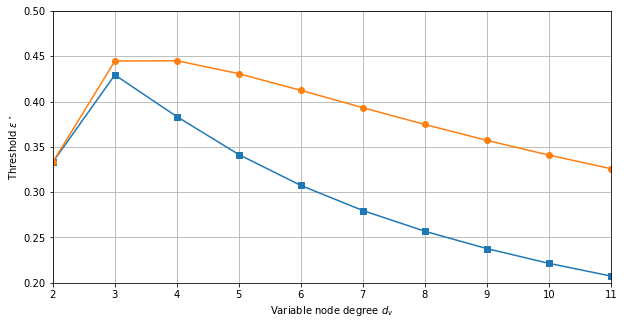

In [70]:
dv_range = np.arange(2,12)

thresholds_LDPC = [threshold_LDPC(dv,2*dv) for dv in dv_range]
thresholds_RA = [threshold_RA(dv,dv) for dv in dv_range]

plot.figure(figsize=(10,5))
plot.plot(dv_range, thresholds_LDPC, '-s')
plot.plot(dv_range, thresholds_RA, '-o')
plot.xlabel(r'Variable node degree $d_v$')
plot.ylabel(r'Threshold $\epsilon^\star$')
plot.ylim(0.2,0.5)
plot.xlim(2,11)
plot.grid()
plot.show()